<a href="https://colab.research.google.com/github/anandra-1/EasyVisa/blob/main/EasyVisa_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 xgboost==2.0.3 -q --user


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To impute missing values
from sklearn.impute import SimpleImputer

# To preprocess and model selection
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score,StratifiedKFold

# to build model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To impute missing values
from sklearn.impute import SimpleImputer


# Install and import external libraries
!pip install xgboost
!pip install imblearn --user

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read dataset from the path
df = pd.read_csv("/content/drive/MyDrive/PG_ML_AI/Projects/EasyVisa.csv")

In [ ]:
#copy dataset
data = df.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
# view first 5 records
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# Checking duplicate in the dataset
data.duplicated().sum()

np.int64(0)

* No Duplicate data in the dataset

#### Understand the shape of the dataset

In [ ]:
# view shape of dataset
data.shape

(25480, 12)

* Dataset contains Rows : 25480 and Columns : 12

#### Check the data types of the columns for the dataset

In [ ]:
# view metadata of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
#Check for null values
data.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


*   No missing values in any column
*   Object : 9 columns, int64: 2 columns and float6 : 1 column


In [ ]:
#converting the object type to Category dataype
object_cols = data.select_dtypes(include='object').columns

for col in object_cols:
    data[col] = data[col].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
# Statistical Summary of the numerical data and transpose for better format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


*   The no_of_employees feature has mininum of -26 which means this feature has data anomalies and need to be further investigated and treated, average of 5667 and max of 602069.

*   yr_of_estab feature has min of 1800 which seems to be data anomalies and need to be further investigated and treated, average of 1979 and max year as 2016.

*   prevailing_wage feature has min of 2.13 which seems to be data anomalies and need to be further investigated and treated, average of 70K and max 319K.

#### Fixing the negative values in number of employees columns

In [ ]:
#Checking shape of dataset with only negative values
data[data["no_of_employees"] < 0].shape

(33, 12)

There are 33 records which are having negative values can be due to human error.
Considering this and converting into positive values will have not much impact as there are only 33 reocrds.

In [ ]:
#Convering negative values by absolute values of number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

In [ ]:
#alidating the changes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all categorical variables i.e object data types
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    # Calculate counts
    counts = df[column].value_counts()

    # Calculate percentages
    percentages = df[column].value_counts(normalize=True) * 100

    # Combine into a single DataFrame
    result = pd.DataFrame({'count': counts, 'percentage': percentages})

    # Optionally, round the percentage values
    result['percentage'] = result['percentage'].round(1)

    # Display the result
    print(result)
    print("-" * 50)

           count  percentage
case_id                     
EZYV25480      1         0.0
EZYV01         1         0.0
EZYV02         1         0.0
EZYV03         1         0.0
EZYV04         1         0.0
...          ...         ...
EZYV13         1         0.0
EZYV12         1         0.0
EZYV11         1         0.0
EZYV10         1         0.0
EZYV09         1         0.0

[25480 rows x 2 columns]
--------------------------------------------------
               count  percentage
continent                       
Asia           16861        66.2
Europe          3732        14.6
North America   3292        12.9
South America    852         3.3
Africa           551         2.2
Oceania          192         0.8
--------------------------------------------------
                       count  percentage
education_of_employee                   
Bachelor's             10234        40.2
Master's                9634        37.8
High School             3420        13.4
Doctorate               21

#### Observations:

*   case_id: this column has 25,480 unique values.
*   continent: 6 continents represented and Asia having more than 60% of the employees.
*   education_of_employee:40% Bachelor's degree and 37% Masters being most common among the employees.
*   yr_of_estab: 199 unique establishment years show varied company ages.
*   has_job_experience: 58% of the employees have job experience and 41% of them dont have job experience.
*   requires_job_training: 88% of the employees dont need job training.
*   region_of_employment: 5 employment regions are presen and majority being Northeast region.
*   unit_of_wage: 90% of the wage unit is in year.
*   full_time_position: 90% of the employee have full time postion.
*   case_status: 66% of the employees are certified

In [ ]:
# Drop 'case_id' column from the data
data.drop("case_id", axis=1, inplace=True)
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

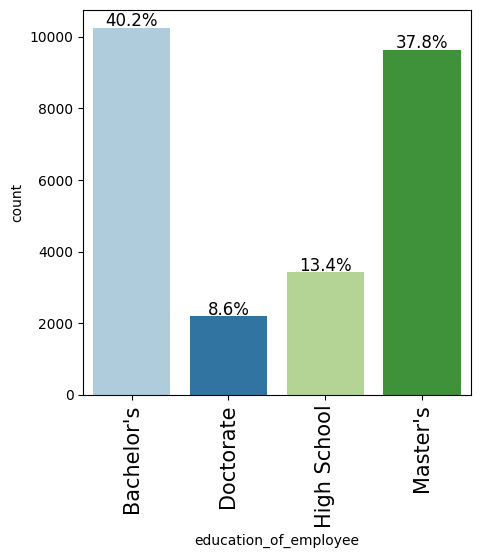

In [ ]:
# Plotting the distribution
labeled_barplot(data, 'education_of_employee', perc = True)

#### Observations on region of employment

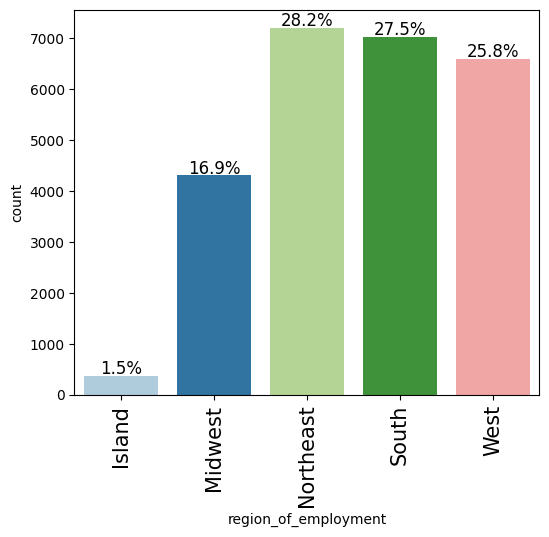

In [ ]:
# Plotting the distribution for region of employement
labeled_barplot(data, 'region_of_employment', perc = True)

#### Observations on job experience

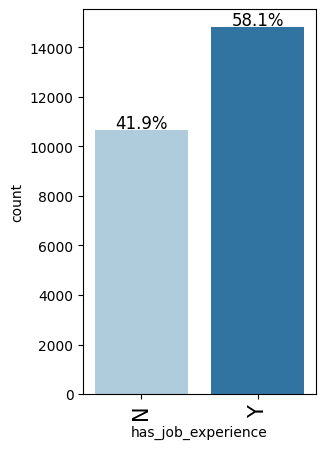

In [ ]:
# Plotting the distribution
labeled_barplot(data, 'has_job_experience', perc = True)

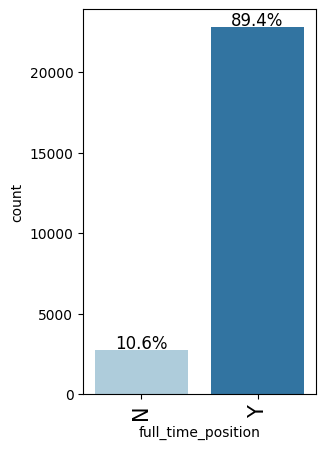

In [ ]:
# Plotting the distribution
labeled_barplot(data, 'full_time_position', perc = True)

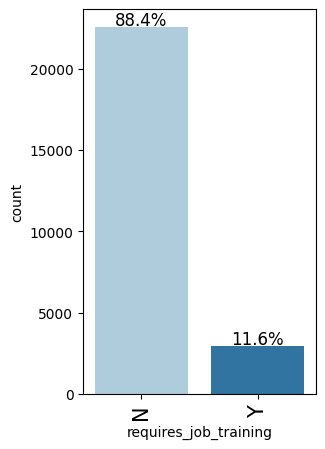

In [ ]:
# Plotting the distribution
labeled_barplot(data, 'requires_job_training', perc = True)

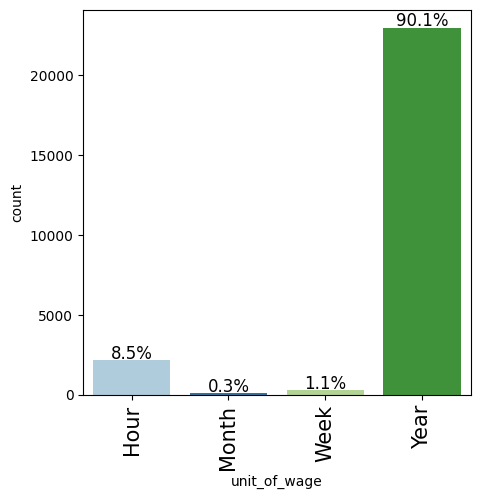

In [ ]:
# Plotting the distribution
labeled_barplot(data, 'unit_of_wage', perc = True)

#### Observations on case status

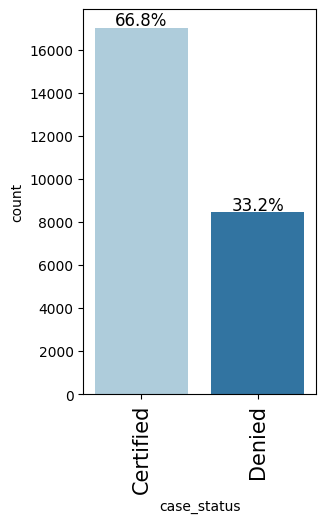

In [ ]:
# Plotting the distribution
labeled_barplot(data, "case_status", perc=True)

#### Observation:

1. Educational Qualifications:
Over 70% of registered employees held either a Bachelor's or Master's degree. Specifically, Bachelor's degree holders comprised 40.2% of the total, while those with Doctorate degrees represented the smallest group at 8.6%.

2. Region of Employment:
The Northeast (28.2%), South (27.5%), and West (25.8%) emerged as the top three preferred employment regions. Conversely, the Island region was the least favored, attracting only 1.5% of the workforce.

3. Job Experience:
A majority of 58.1% of registered employees had prior work experience, whereas 41.9% had none.

4. Employment Types:
Full-time positions were predominant, with 89.4% of employees registered accordingly. The remaining 10.6% were associated with other employment types.

5. Job Training Requirements:
A significant 88.4% of registered employees did not require job training, leaving 11.6% who did.

6. Wage Payment Structures:
An overwhelming 90.1% of employees were compensated on an annual basis, while a mere 0.3% received monthly wages.

7. Outcomes of Employee Registration Requests
A majority of 66.8% of employee registration requests were approved (certified), whereas 33.2% were denied.

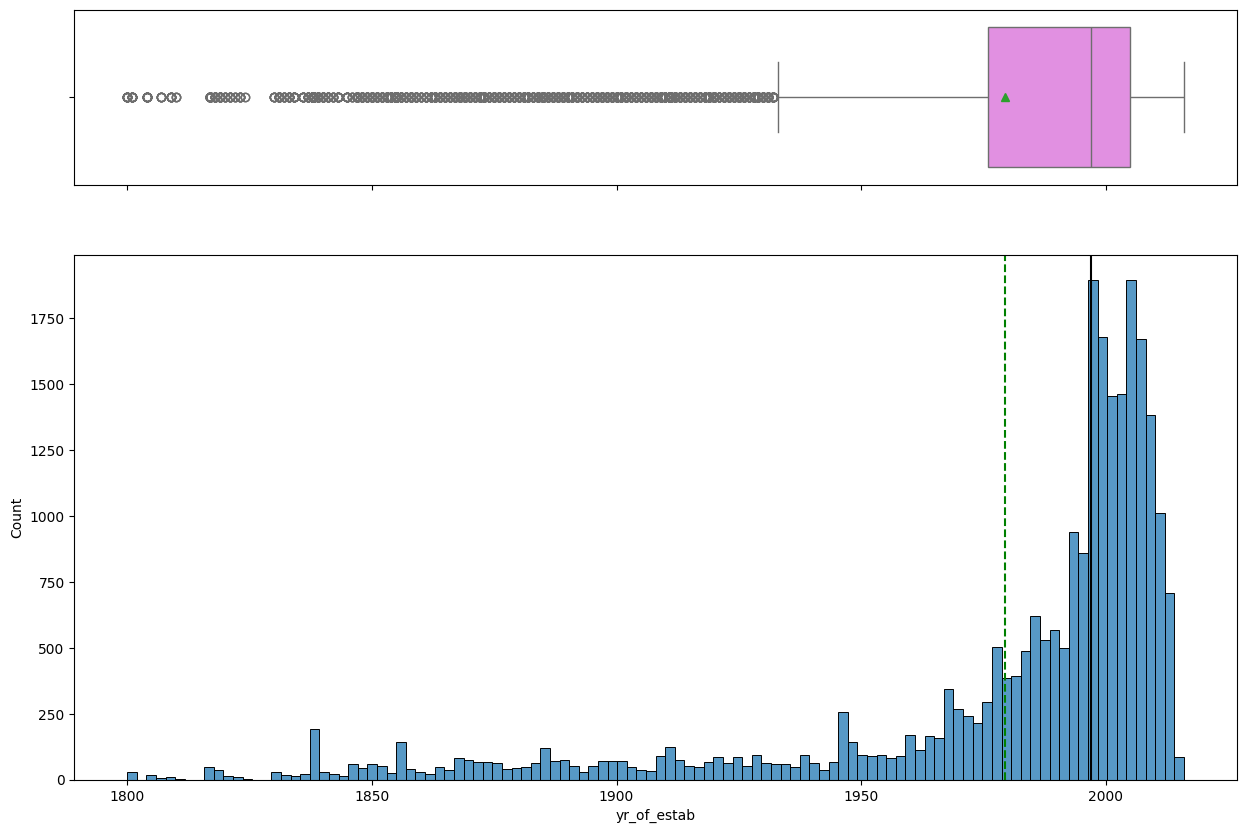

In [ ]:
# Plotting the distribution on year of establishment
histogram_boxplot(data, 'yr_of_estab')

#### Observation:
*   A significant increase in establishments begins around the 1980s showing rapid establishment growth.
*   There are a small number of establishments before 1950, confirming they are statistical outliers.
*   Long tail of low-frequency values extending back to the 1800s, on the left side of the histogram. This matches the characteristics of a left-skewed distribution.

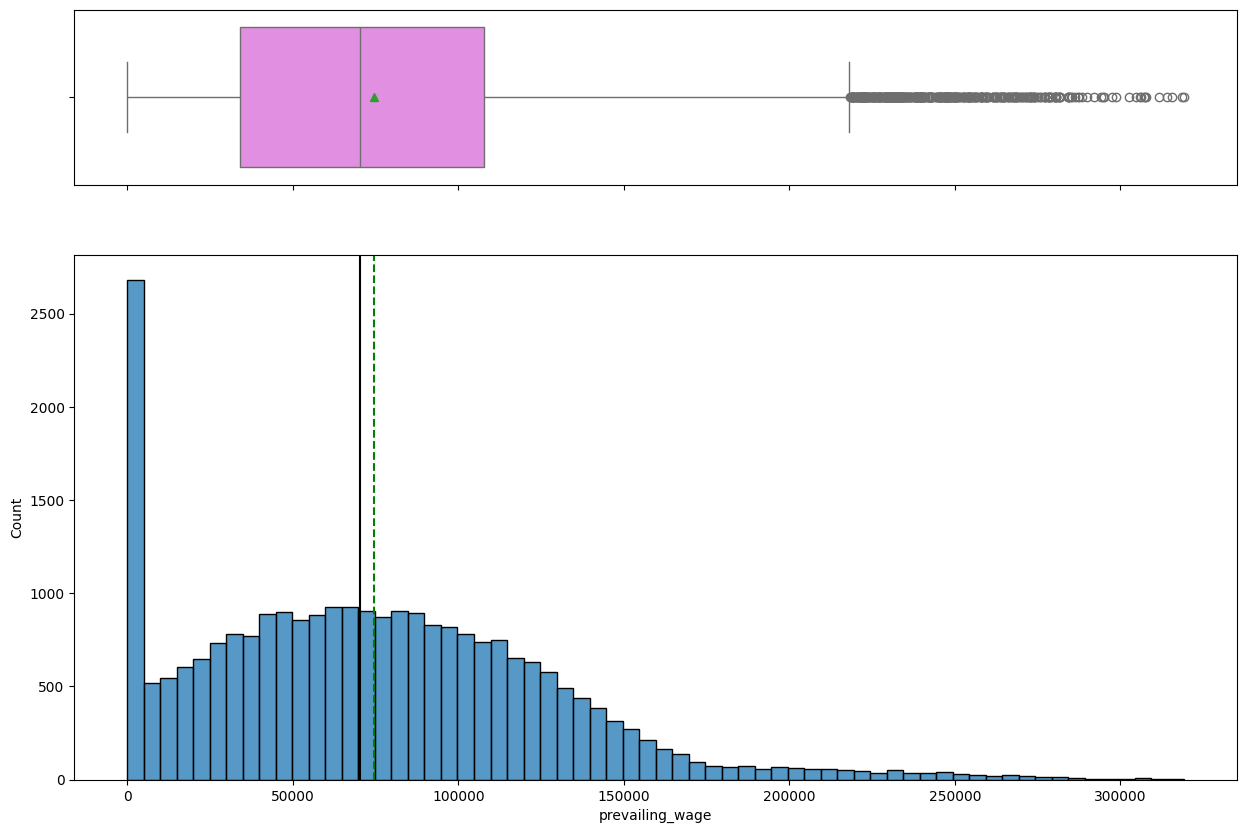

In [ ]:
# Plotting the distribution on prevailing wage
histogram_boxplot(data, 'prevailing_wage')

#### Obervation:
*    A large number of values are concentrated on the left (lower wage values).
*    A long tail extends to the right, with fewer records having extremely high wages.
*    The sharp spike at or near zero suggests possible data issues
*    The median line is towards the left of the box.
*    There's a long right whisker and many right-side outliers, consistent with positive skew.
*    The mean (green triangle) is to the right of the median, which also indicates right skewness.

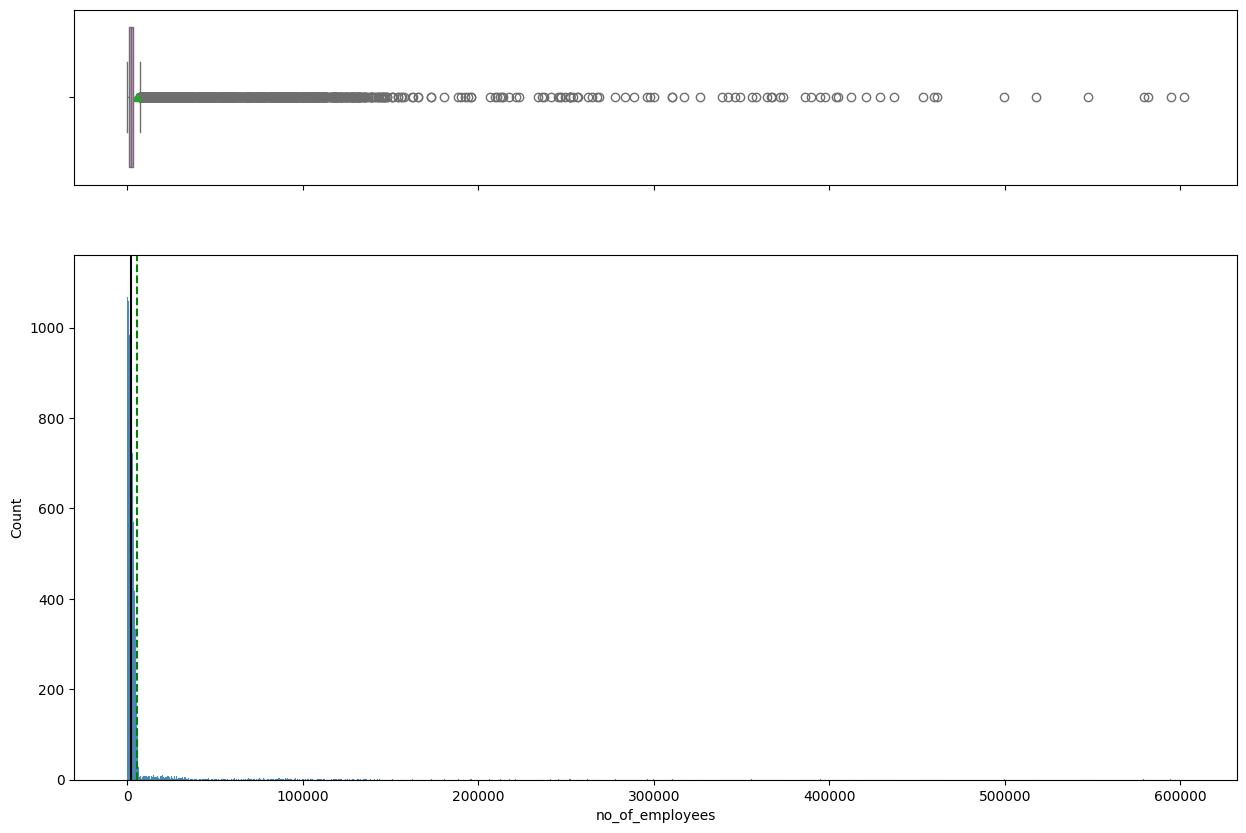

In [ ]:
# Plotting the distribution on no of employees
histogram_boxplot(data, 'no_of_employees')

#### Observation:
*   Most values are clustered close to zero on the left.
*   There's a long tail extending far to the right — indicating a small number of companies with very large employee counts.
*   There are many right-side outliers, some extremely far from the rest of the data.
*   The no_of_employees distribution is right-skewed.
*   Most organizations have relatively few employees.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

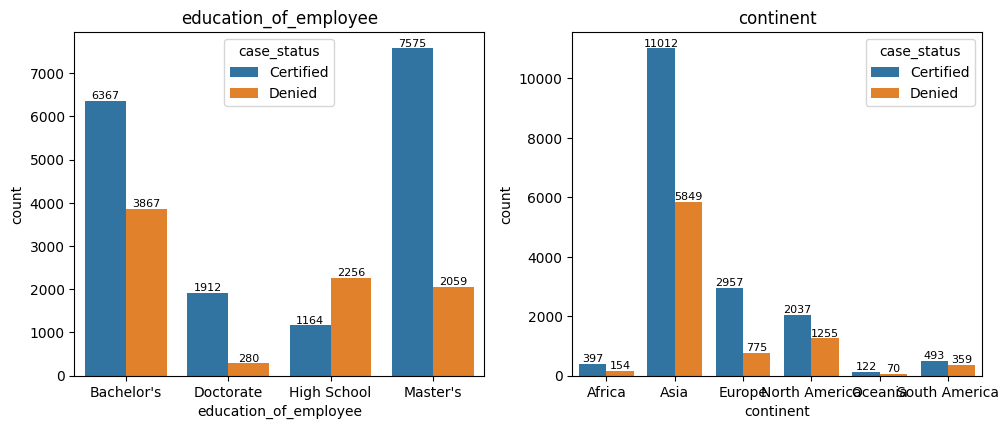

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 12))
features=['education_of_employee','continent']

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.title(feature)

    ax = sns.countplot(data=data, x=feature, hue='case_status')

    # Add count labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show();

##### Obesrvations:
Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

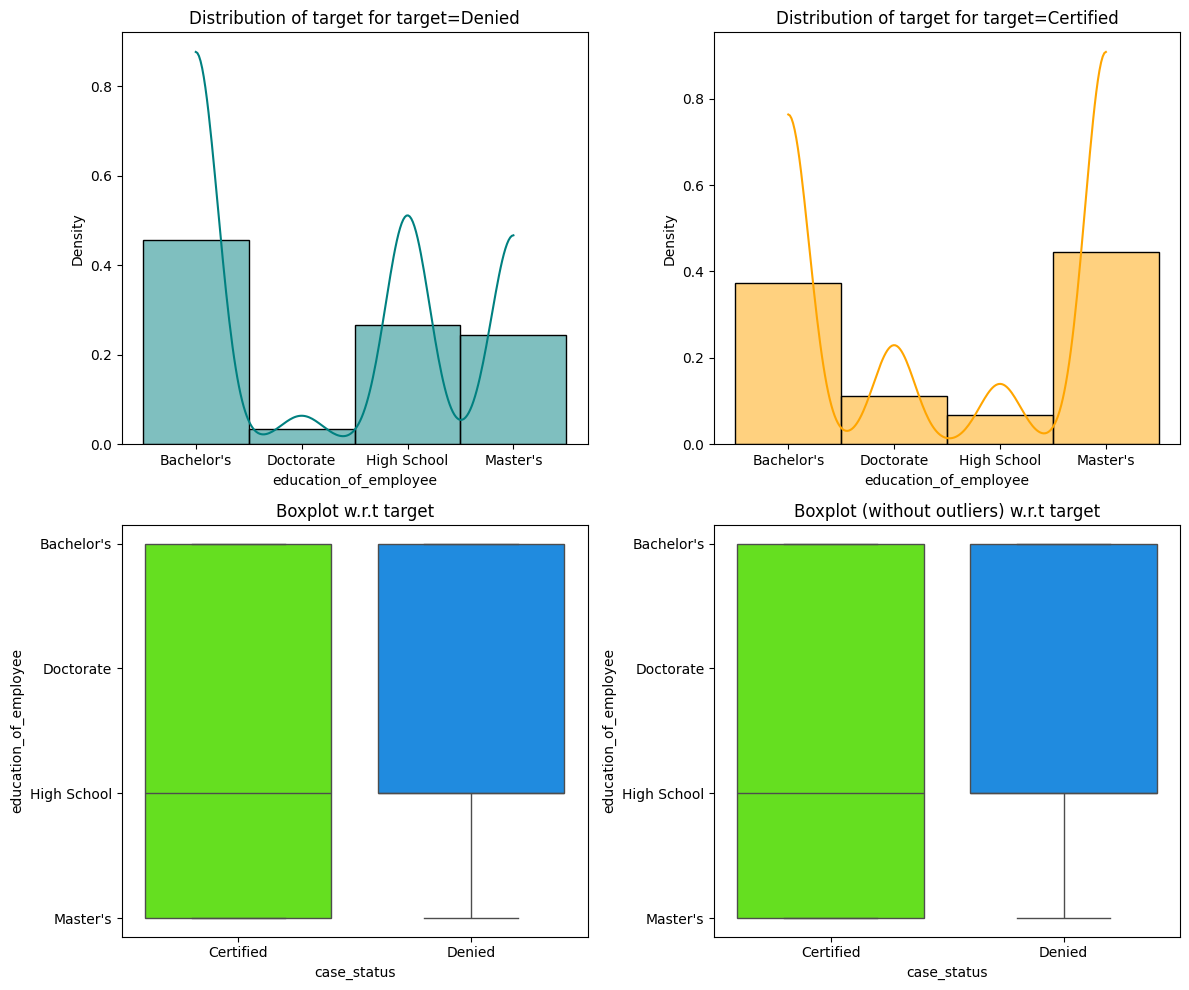

In [ ]:
# Plotting the distribution on education of employee
distribution_plot_wrt_target(data,"education_of_employee","case_status")

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


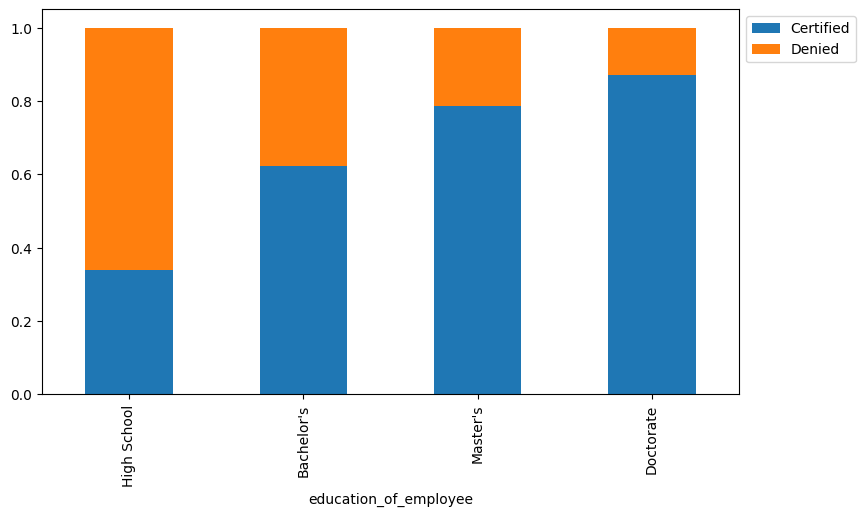

In [ ]:
# Plotting the distribution on education of employee vs case status
stacked_barplot(data,"education_of_employee","case_status")

##### Observation:
* As the employee's degree level increases the Visa approval rate increases
* The certified status are more concentrated towards Bachelors and Master degree where as the denied status are boarder distribution

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

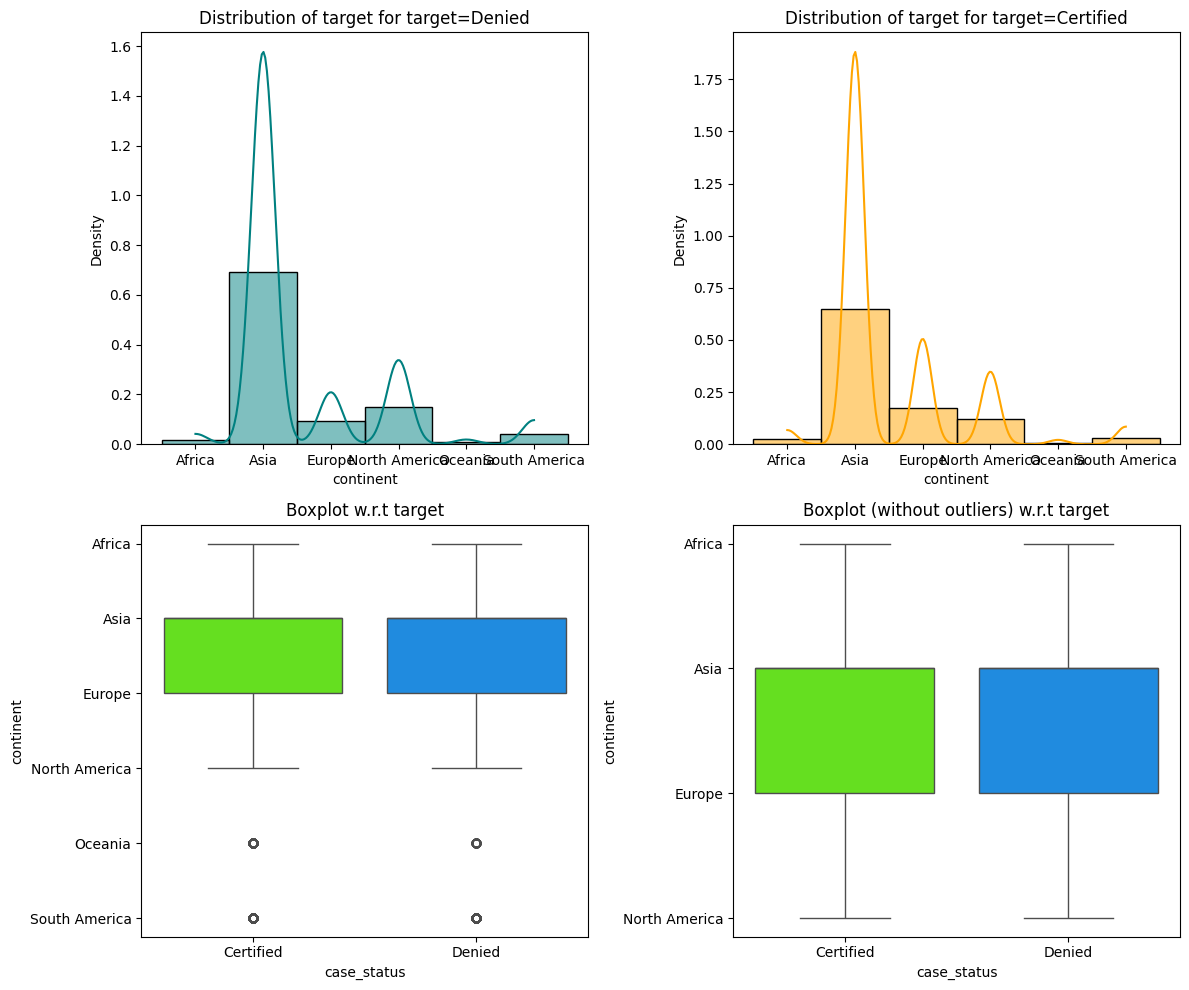

In [ ]:
# Plotting the distribution on continent vs case status
distribution_plot_wrt_target(data,"continent","case_status")

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


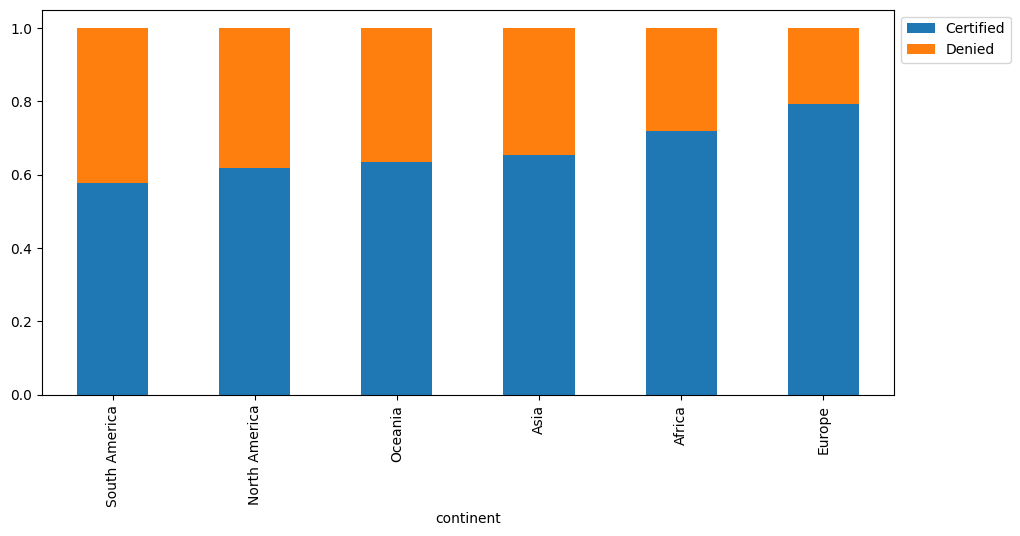

In [ ]:
# Plotting the distribution
stacked_barplot(data,"continent","case_status")

##### Observation:
* Europe has the highest chance of getting certified, while South America has the lowest chance
* South America and North America chances of denial are high compared to other continents
* Asian employees are the highest applying for visa

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

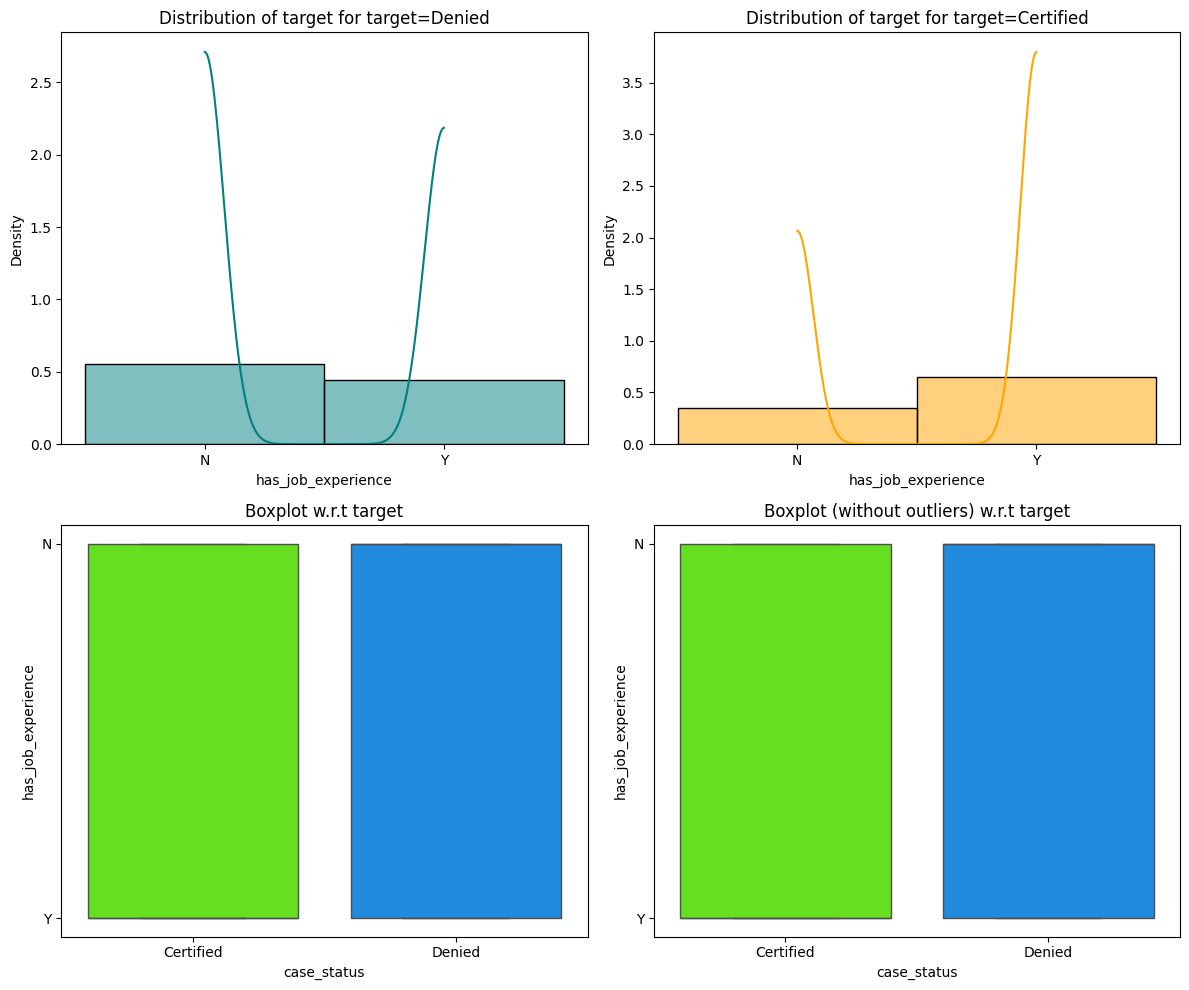

In [ ]:
# Plotting the distribution on has job experience vs case status
distribution_plot_wrt_target(data,"has_job_experience","case_status")

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


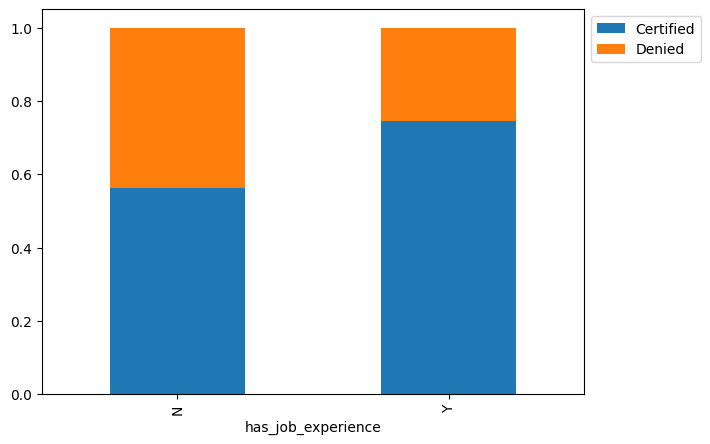

In [ ]:
# Plotting the distribution
stacked_barplot(data,"has_job_experience","case_status")

##### Observation:
The  plot shows for individuals with job experience (Y) compared to those without (N), suggesting that lack of job experience may contribute to denial, though the difference is not extreme.

#### Checking if the prevailing wage is similar across all the regions of the US

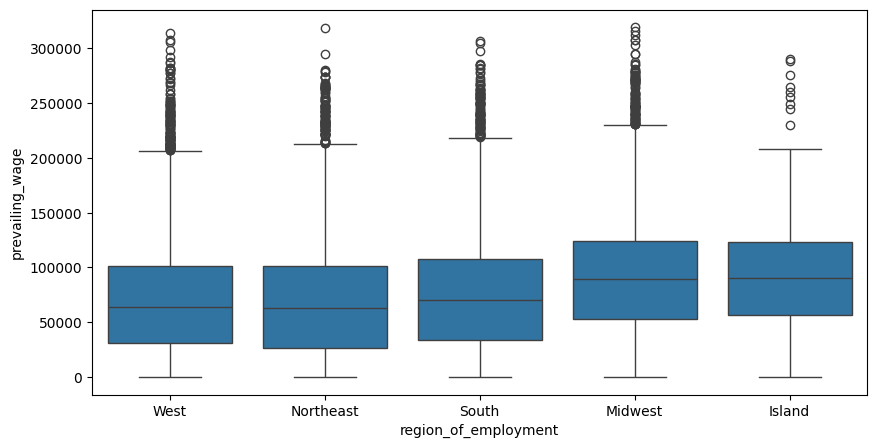

In [ ]:
# Plotting the distribution on region of employement
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="region_of_employment", y="prevailing_wage")
plt.show()

##### Observation:
* In all regions, there are many high-wage outliers (dots above the boxes), indicating that while most wages are concentrated at lower levels, a few roles offer significantly higher wages.
* Midwest and Island have noticeably higher median wages compared to other regions.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

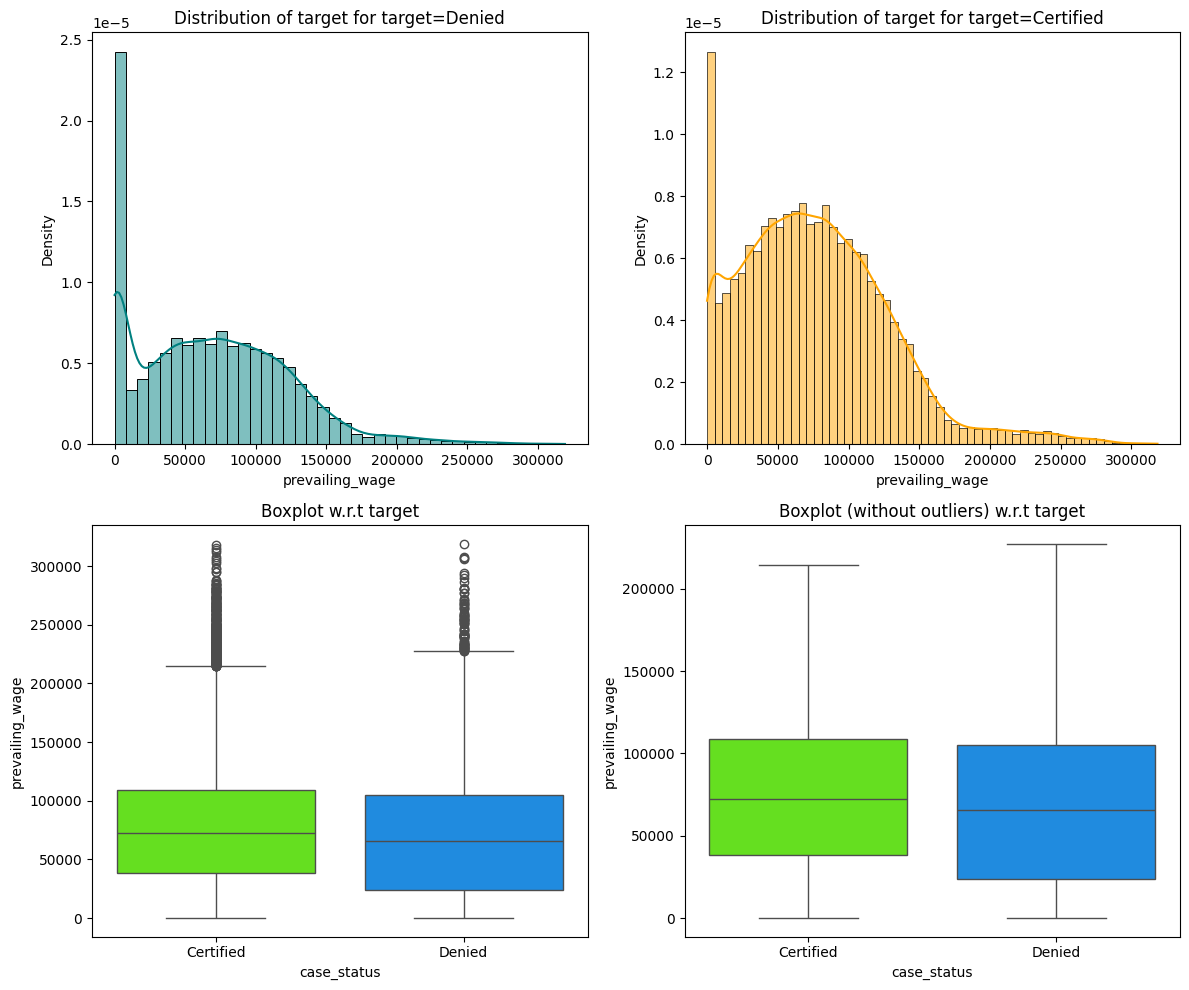

In [ ]:
# Plotting the distribution prevailing wage vs case status
distribution_plot_wrt_target(data,"prevailing_wage","case_status")

##### Observation:

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

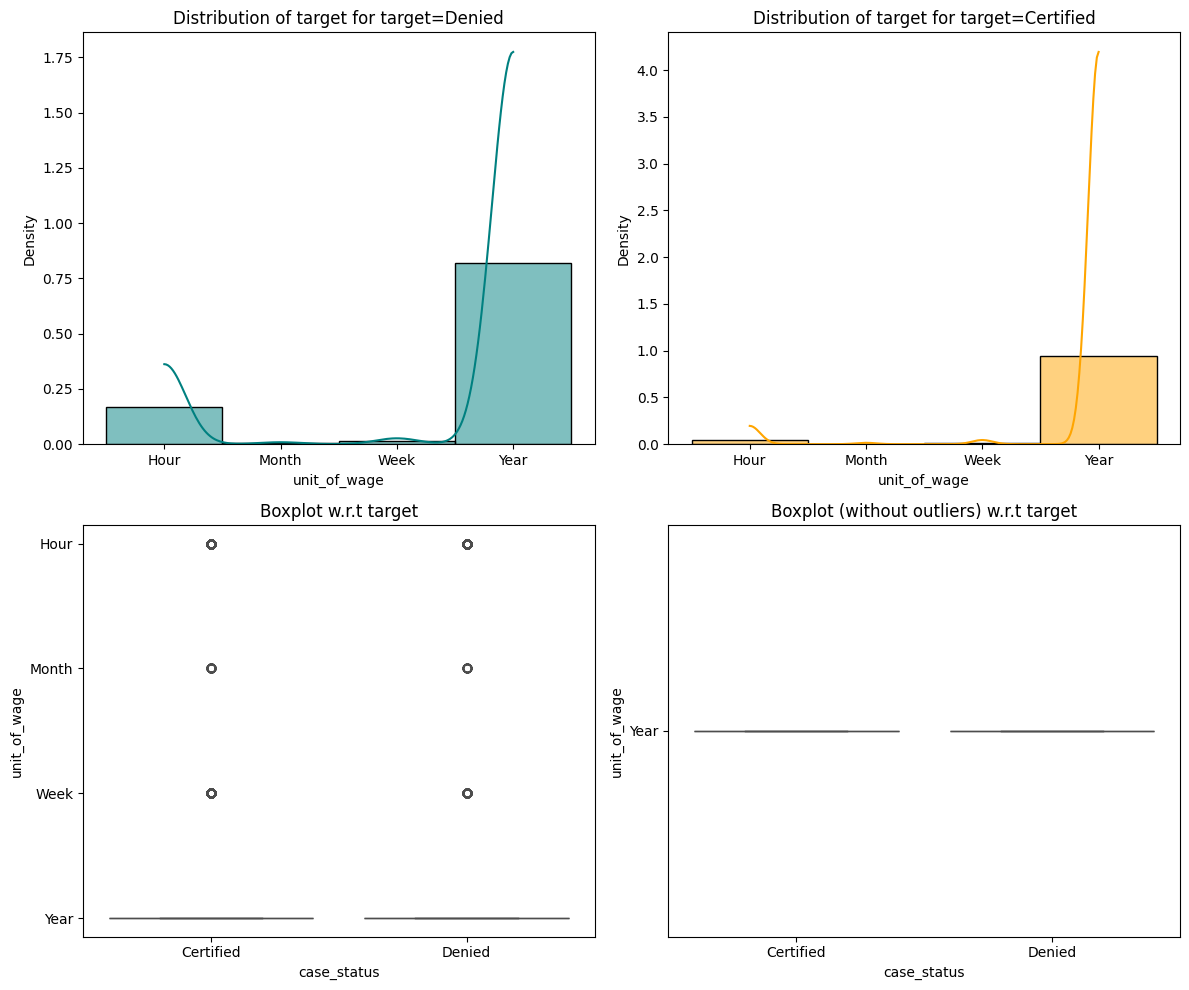

In [ ]:
# Plotting the distribution on unit of wage vs case status
distribution_plot_wrt_target(data,"unit_of_wage","case_status")

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


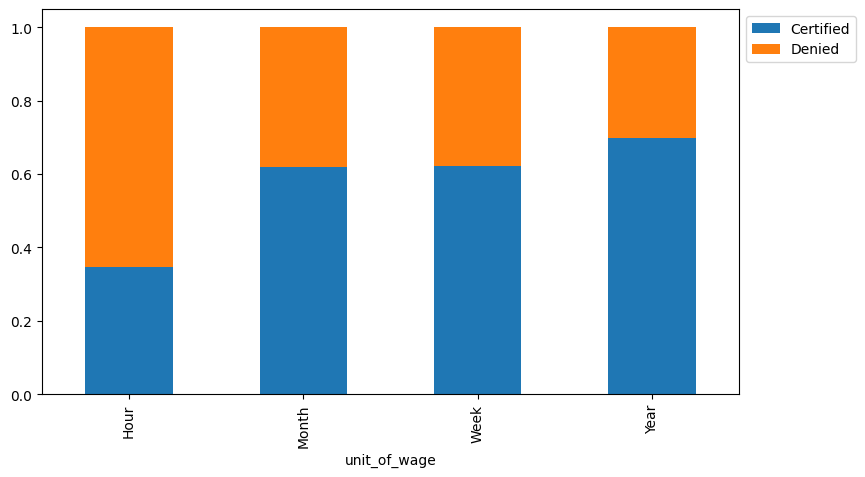

In [ ]:
# Plotting the distribution unit of wage vs case status
stacked_barplot(data,"unit_of_wage","case_status")

##### Observation:
The overwhelming preference for the "Year" unit of wage in both certified and denied cases suggests it is the default standard for wage documentation in visa applications. Other units (Hour, Month, Week) appear infrequently and may not significantly influence outcomes.

#### corelation between numeric columns

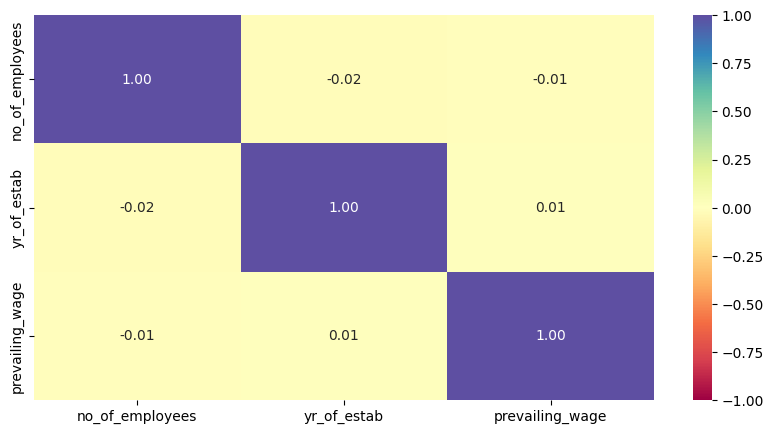

In [ ]:
# HeatMap correlation of data
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

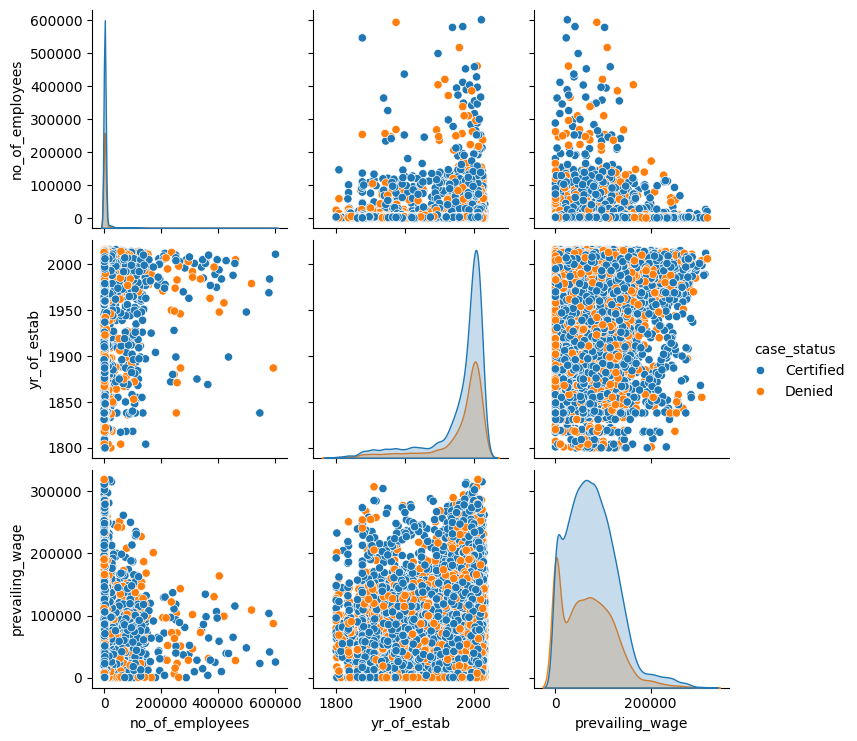

In [ ]:
#Pairplot of numeric columns
sns.pairplot(data, hue="case_status")

##### Observation:

It seems that there is little to no correlation between the numerical variables in the dataset.

* Number of Employees: Plot shows a dense concentration of data points at lower employee counts (0-200,000), with both Certified and Denied cases overlapping significantly. A few outliers extend to higher numbers (up to 600,000), predominantly Certified. The overlap suggests employee count alone is not a strong differentiator.

* Year of Establishment (yr_of_estab): Plot shows Data points are clustered between 1800 and 2000, with a slight increase in Certified cases toward recent years. The year of establishment does not strongly correlate with certification or denial, as distributions are similar.

* Prevailing Wage: Plot displays a wide range (0-300,000), with a dense cluster at lower wages (0-$100,000) for both Certified and Denied cases. Certified cases show a broader spread into higher wages.

## Data Pre-processing

##### Observation:
No missing values so no missing value treatment is required

### Outlier Check

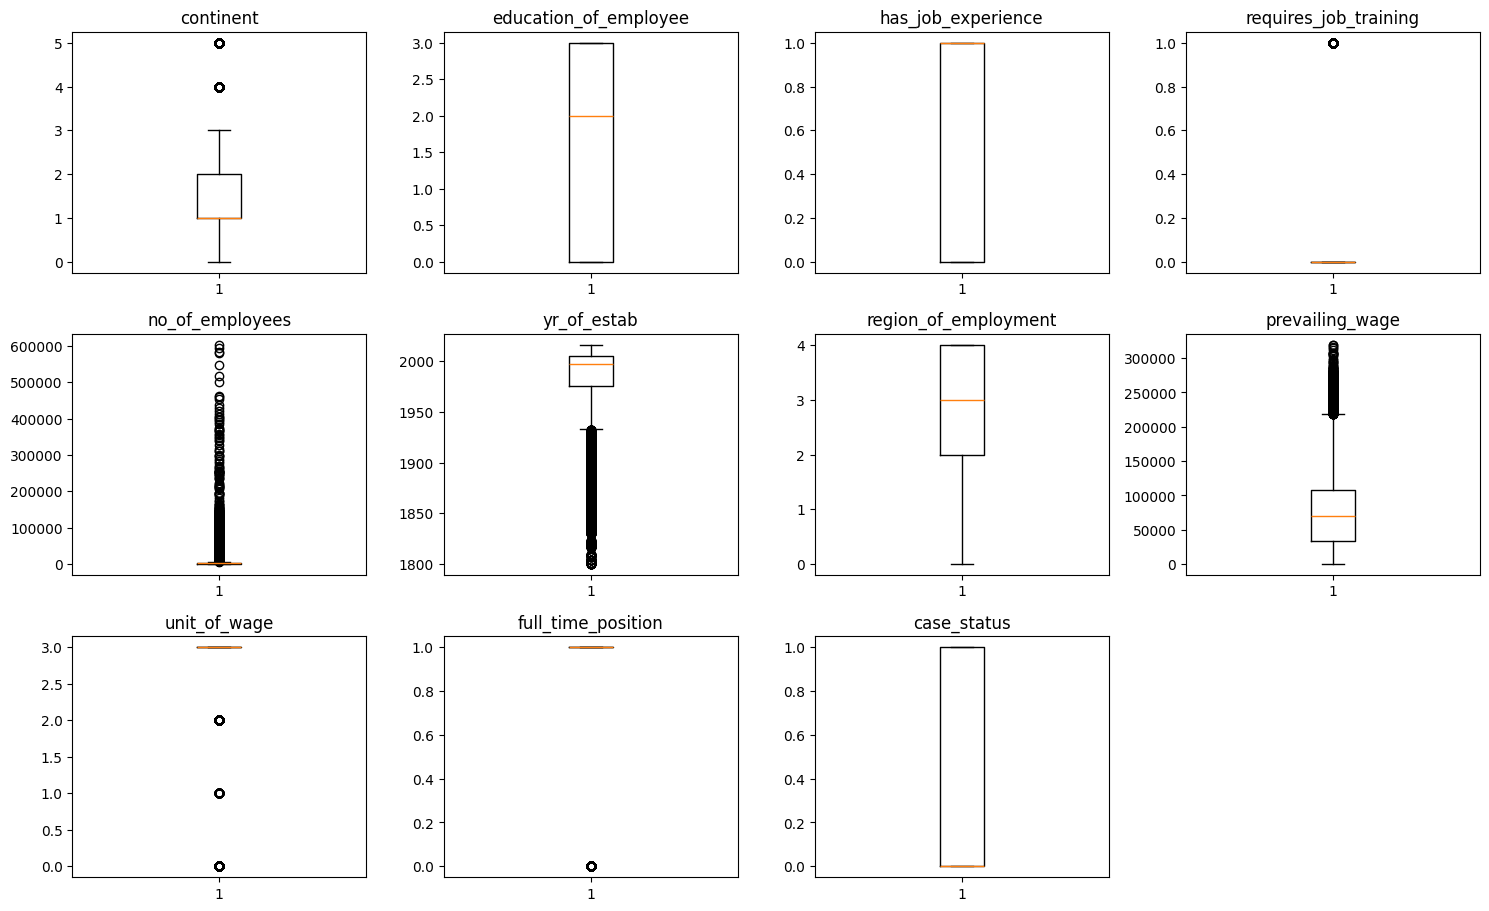

In [ ]:
# Checking the outliners for the category columns
data_encoded = data.copy()

for col in data_encoded.select_dtypes(include='category').columns:
    data_encoded[col] = data_encoded[col].cat.codes

numeric_columns = data_encoded.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data_encoded[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  int8   
 1   education_of_employee  25480 non-null  int8   
 2   has_job_experience     25480 non-null  int8   
 3   requires_job_training  25480 non-null  int8   
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  int8   
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  int8   
 9   full_time_position     25480 non-null  int8   
 10  case_status            25480 non-null  int8   
dtypes: float64(1), int64(2), int8(8)
memory usage: 796.4 KB


##### Observations:

* no_of_employees: The distribution shows extreme right-skewness. A large number of outliers at the higher end suggest the presence of very large organizations. The majority of businesses have employee counts concentrated near the lower range.

* yr_of_estab: The establishment years are moderately spread, with most companies founded post-1900. A few records show very early establishment years and may require further validation for accuracy.

* prevailing_wage: Strong right-skew with a long tail toward high wage values. Most wages are concentrated in the lower to mid-range, with a significant number of outliers in the upper range, possibly due to specialized or executive-level roles.

### Data Preparation for modeling

In [ ]:
# dropping the target variable
X = data.drop(["case_status"], axis=1)
y = data["case_status"]

In [ ]:
# split the dataset into train and temp
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# split the temp dataset into validation and test

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(13377, 10) (4459, 10) (7644, 10)


In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
dtype: int64
------------------------------
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
dtype: int64
------------------------------
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
dtype: int64


In [ ]:
print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
case_status
Certified    0.667896
Denied       0.332104
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
case_status
Certified    0.667938
Denied       0.332062
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
case_status
Certified    0.667863
Denied       0.332137
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
case_status
Certified    0.667844
Denied       0.332156
Name: proportion, dtype: float64
********************************************************************************


In [ ]:
# Replace categorical values with numeric codes in train, val, and test sets
replace_values = {
    'education_of_employee': {'Doctorate': 1, "Master's": 2, "Bachelor's": 3, 'High School': 4},
    'has_job_experience': {'Y': 1, "N": 0},
    'requires_job_training': {'Y': 1, "N": 0},
    'full_time_position': {'Y': 1, "N": 0}
}

X_train = X_train.replace(replace_values)
X_val = X_val.replace(replace_values)
X_test = X_test.replace(replace_values)

In [ ]:

# One-hot encode training data
X_train = pd.get_dummies(X_train, columns=['continent', 'region_of_employment','unit_of_wage'], drop_first=True)

# One-hot encode val data
X_val = pd.get_dummies(X_val, columns=['continent', 'region_of_employment','unit_of_wage'], drop_first=True)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

# One-hot encode test data
X_test = pd.get_dummies(X_test, columns=['continent', 'region_of_employment','unit_of_wage'], drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
# Convert all columns in train, val, and test sets to float type
X_train = X_train.astype('float')
X_val = X_val.astype('float')
X_test = X_test.astype('float')

In [ ]:
# Map target labels to numeric values in train, val, and test sets
y_train = y_train.map({'Certified': 1, 'Denied': 0})
y_val = y_val.map({'Certified': 1, 'Denied': 0})
y_test = y_test.map({'Certified': 1, 'Denied': 0})

## Model Building

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

In [ ]:
def evaluate_models(models,model_type, X_fit, y_fit, scoring, show_recall=True):
    """
    Evaluate a list of models using cross-validation and validation set.

    Parameters:
        models (list): List of tuples like [('ModelName', model_object), ...]
        X_fit(DataFrame):  features
        y_fit (Series): labels
        scoring (str): Metric for cross_val_score (default='accuracy')
        show_recall (bool): If True, shows recall score on validation set
    """
    print("\nCross-Validation Performance on Training Dataset:\n")
    cv_results = []
    model_names = []

    for name, model in models:
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
        cv_score = cross_val_score(model, X_fit, y_fit, scoring=scoring, cv=kfold)
        cv_results.append(cv_score)
        model_names.append(name)
        print(f"{name}: {cv_score.mean():.4f}")

    if show_recall:
        print("\nValidation Performance (Recall):\n")
        for name, model in models:
            model.fit(X_fit, y_fit)
            val_recall = recall_score(y_val, model.predict(X_val))
            print(f"{name}: {val_recall:.4f}")
    # Plotting boxplots for CV scores of all models defined above
    plt.figure(figsize=(7,5))
    plt.boxplot(cv_results, labels=model_names)
    plt.title(f"{model_type}-Cross-validation Recall Comparison")
    plt.xlabel("Model")
    plt.ylabel("Recall")
    plt.grid(axis="y")
    plt.show()

### Model building with original data


Cross-Validation Performance on Training Dataset:

Bagging: 0.7734
Random forest: 0.8459
GBM: 0.8752
Adaboost: 0.8863
dtree: 0.7339

Validation Performance (Recall):

Bagging: 0.7811
Random forest: 0.8455
GBM: 0.8650
Adaboost: 0.8842
dtree: 0.7535


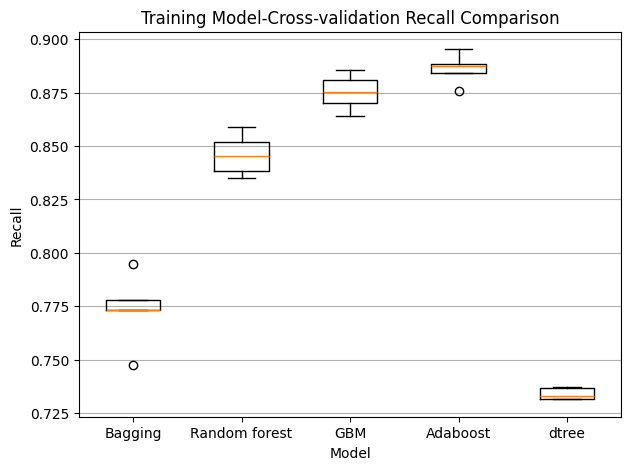

In [ ]:
models = []  # Empty list to store all the models

# Define a list of classification models to evaluate.
# Includes ensemble methods (Bagging, Random Forest, GBM, AdaBoost) and a base Decision Tree.
# All models use a fixed random_state for reproducibility.
# Class weights are balanced where applicable to handle class imbalance in the dataset.
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("Adaboost", AdaBoostClassifier(random_state=1)),
    ("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced'))
]

# Run on oversampled data and get results as DataFrame
evaluate_models(models, "Training Model", X_train, y_train, 'recall',True)

### Model Building with oversampled data

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 8935
Before OverSampling, counts of label '0': 4442 

After OverSampling, counts of label '1': 8935
After OverSampling, counts of label '0': 8935 

After OverSampling, the shape of train_X: (17870, 19)
After OverSampling, the shape of train_y: (17870,) 




Cross-Validation Performance on Training Dataset:

Bagging: 0.7678
Random forest: 0.8298
GBM: 0.8630
Adaboost: 0.8426
dtree: 0.7265

Validation Performance (Recall):

Bagging: 0.7733
Random forest: 0.8321
GBM: 0.8583
Adaboost: 0.8415
dtree: 0.7307


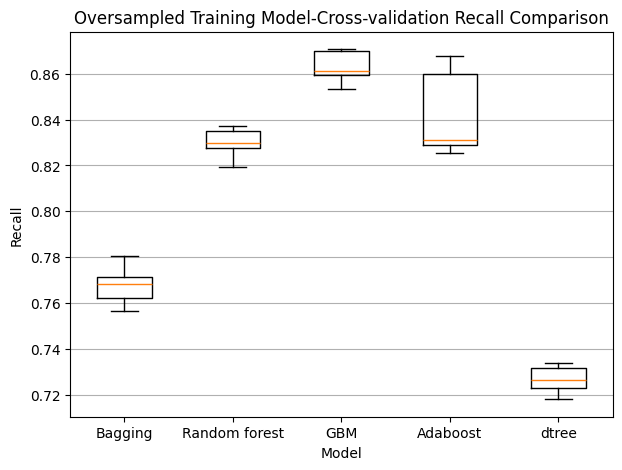

In [ ]:
models = []  # Empty list to store all the models

models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random forest", RandomForestClassifier(random_state=1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("Adaboost", AdaBoostClassifier(random_state=1)),
    ("dtree", DecisionTreeClassifier(random_state=1))
]

# Run on oversampled data and get results as DataFrame
evaluate_models(models, "Oversampled Training Model", X_train_over, y_train_over, 'recall', True)

### Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 8935
Before UnderSampling, counts of label '0': 4442 

After UnderSampling, counts of label '1': 4442
After UnderSampling, counts of label '0': 4442 

After UnderSampling, the shape of train_X: (8884, 19)
After UnderSampling, the shape of train_y: (8884,) 




Cross-Validation Performance on Training Dataset:

Bagging: 0.6146
Random forest: 0.6711
GBM: 0.7103
Adaboost: 0.7112
dtree: 0.6175

Validation Performance (Recall):

Bagging: 0.6091
Random forest: 0.6558
GBM: 0.7001
Adaboost: 0.7082
dtree: 0.6091


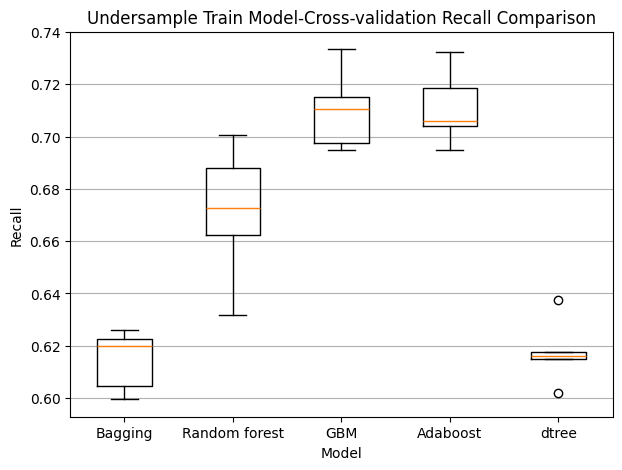

In [ ]:
models = []  # Empty list to store all the models

models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random forest", RandomForestClassifier(random_state=1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("Adaboost", AdaBoostClassifier(random_state=1)),
    ("dtree", DecisionTreeClassifier(random_state=1))
]

# Run on oversampled data and get results as DataFrame
evaluate_models(models, "Undersample Train Model", X_train_un, y_train_un, 'recall',True)

##### Observation:
* Training: This comparison highlights that ensemble methods like Random Forest and GBM tend to outperform single models (Decision Tree) and other ensemble methods (Bagging, AdaBoost) in terms of recall, based on the cross-validation results.

* Oversampling: This comparison suggests that oversampling improves the recall of ensemble methods especially GBM and AdaBoost more than the single Decision Tree model, aligning with the trend of ensemble methods benefiting from balanced datasets.

* Underssampling: This comparison suggests that undersampling benefits AdaBoost and GBM more in terms of recall, while Bagging and Decision Tree perform less effectively under this approach.

* Overall GBM , Adaboost and Random Forest are the top performing models.

##### RandomForest Model Building

In [ ]:
#Train the random forest classifier
rf_wt = RandomForestClassifier(class_weight='balanced', random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

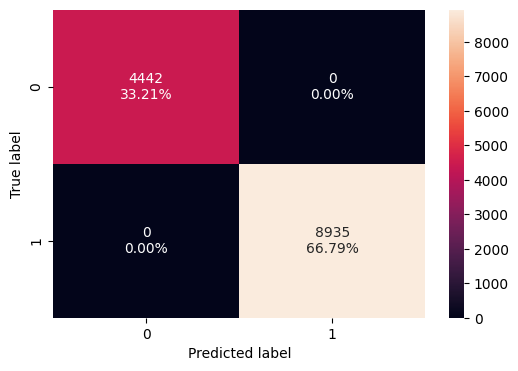

In [ ]:
# Confuction matrix for train dataset
confusion_matrix_sklearn(rf_wt,X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train dataset
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


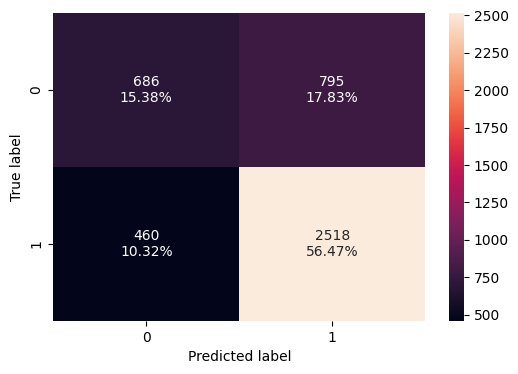

In [ ]:
# Confuction matrix for validation dataset
confusion_matrix_sklearn(rf_wt, X_val,y_val)

In [ ]:
#Using above defined function to get accuracy, recall and precision on validation dataset
rf_wt_model_val_perf=model_performance_classification_sklearn(rf_wt, X_val,y_val)
print("Testing performance \n",rf_wt_model_val_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.718547  0.845534   0.760036  0.800509


### Grandient Boosting Model buildling

In [ ]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
gb_estimator_model_train_perf = model_performance_classification_sklearn(gb_estimator, X_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.755476  0.877001   0.782974  0.827324


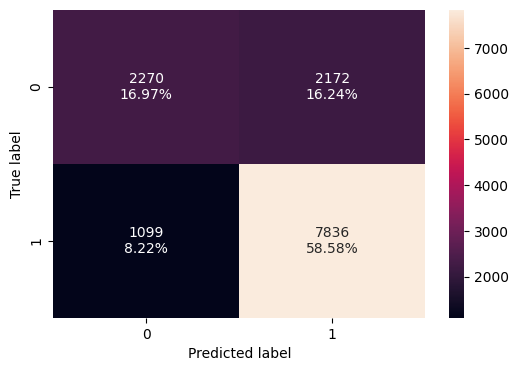

In [ ]:
confusion_matrix_sklearn(gb_estimator, X_train,y_train)

In [ ]:
gb_estimator_model_val_perf = model_performance_classification_sklearn(gb_estimator, X_val, y_val)
print("Testing performance \n",gb_estimator_model_val_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.747926  0.86501   0.781079  0.820905


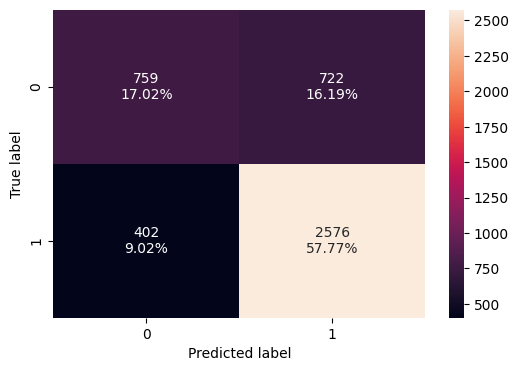

In [ ]:
confusion_matrix_sklearn(gb_estimator, X_val,y_val)

### AdaBoost Model building

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
print("Training performance \n", ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.738133  0.888416   0.760054  0.819237


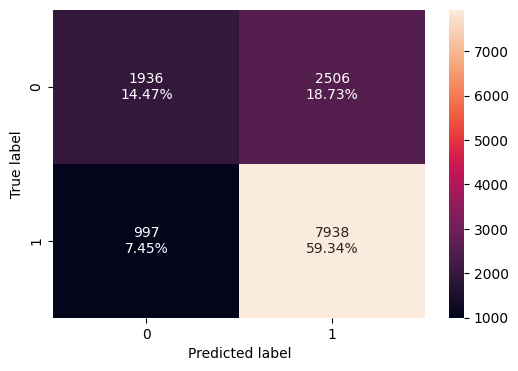

In [ ]:
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [ ]:
ab_classifier_model_val_perf = model_performance_classification_sklearn(ab_classifier, X_val, y_val)
print("Testing performance \n", ab_classifier_model_val_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.740525  0.88415   0.764296  0.819866


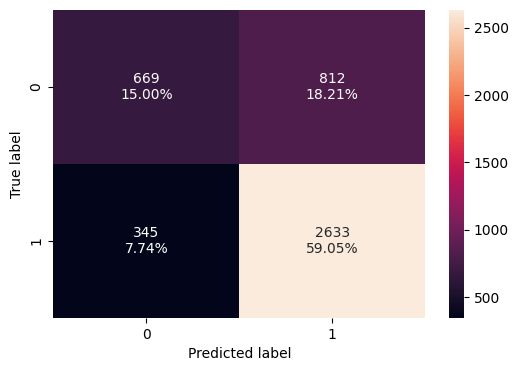

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_val,y_val)

### Comparing Models against Train and validation results

In [ ]:
models_train_comp_df = pd.concat(
    [
        rf_wt_model_train_perf.T,
        rf_wt_model_val_perf.T,
        gb_estimator_model_train_perf.T,
        gb_estimator_model_val_perf.T,
        ab_classifier_model_train_perf.T,
        ab_classifier_model_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "RandomForest (Train)",
    "RandomForest (Validation)",
    "Gradeint Boosting (Train)",
    "Gradeint Boosting (Validation)",
    "AdaBoosting(Train)",
    "AdaBoosting(Validation)",

    ]
print("Training and Validation performance comparison:")
models_train_comp_df

Training and Validation performance comparison:


,RandomForest (Train),RandomForest (Validation),Gradeint Boosting (Train),Gradeint Boosting (Validation),AdaBoosting(Train),AdaBoosting(Validation)
Accuracy,1.0,0.718547,0.755476,0.747926,0.738133,0.740525
Recall,1.0,0.845534,0.877001,0.865010,0.888416,0.884150
Precision,1.0,0.760036,0.782974,0.781079,0.760054,0.764296
F1,1.0,0.800509,0.827324,0.820905,0.819237,0.819866


#### Observation:
* Random Forest memorized the training data but generalizes poorly.

* AdaBoost has slightly better recall (0.884) and nearly equal precision. Gradient Boosting has marginally better precision. Both are preferred over Random Forest due to better generalization and less overfitting.

## Hyperparameter Tuning

### Random Forest model tuning with Undersampled data

In [ ]:
%%time

# Defining the model
Model = RandomForestClassifier(random_state=1)

# Parameter grid
param_grid = {
    "n_estimators": np.arange(150, 301, 50),         # Number of trees
    "max_depth": [5, 10, 15, None],                 # Depth of each tree
    "min_samples_split": [2, 5, 10],                # Min samples to split a node
    "min_samples_leaf": [1, 2, 4],                  # Min samples at a leaf node
    "max_features": [0.5, 0.7, 1],                  # Number of features to consider at split
    "class_weight": [None, 'balanced']              # Try class balancing
}

# Scoring function (focus on recall)
scorer = metrics.make_scorer(metrics.recall_score)


# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1
)


# Fitting RandomizedSearchCV on undersampled data
randomized_cv.fit(X_train_un, y_train_un)

# Printing best parameters
print("Best parameters are {} with CV score={}".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(250), 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': 5, 'class_weight': None} with CV score=0.7537133027290507
CPU times: user 9.41 s, sys: 1.14 s, total: 10.6 s
Wall time: 10min 38s


In [ ]:
tuned_rf1 = RandomForestClassifier(
    **randomized_cv.best_params_,
    random_state=1
)

tuned_rf1.fit(X_train_un, y_train_un)

RandomForestClassifier(max_depth=5, max_features=0.5, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=np.int64(250),
                       random_state=1)

In [ ]:
# Checking model's performance on training set
rf1_train = model_performance_classification_sklearn(
    tuned_rf1, X_train_un, y_train_un
)
rf1_train

,Accuracy,Recall,Precision,F1
0,0.709365,0.77285,0.685777,0.726715


In [ ]:
# Checking model's performance on validation set
rf1_val = model_performance_classification_sklearn(tuned_rf1, X_val, y_val)
rf1_val

,Accuracy,Recall,Precision,F1
0,0.719444,0.754197,0.812297,0.78217


### Random Forest model tuning with Oversampled data

In [ ]:
%%time

# Defining the model
Model = RandomForestClassifier(random_state=1)

# Parameter grid
param_grid = {
    "n_estimators": np.arange(150, 301, 50),         # Number of trees
    "max_depth": [5, 10, 15, None],                 # Depth of each tree
    "min_samples_split": [2, 5, 10],                # Min samples to split a node
    "min_samples_leaf": [1, 2, 4],                  # Min samples at a leaf node
    "max_features": [0.5, 0.7, 1],                  # Number of features to consider at split
    "class_weight": [None, 'balanced']              # Try class balancing
}

# Scoring function (focus on recall)
scorer = metrics.make_scorer(metrics.recall_score)


# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1
)


# Fitting RandomizedSearchCV on undersampled data
randomized_cv.fit(X_train_over, y_train_over)

# Printing best parameters
print("Best parameters are {} with CV score={}".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(250), 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 1, 'max_depth': 15, 'class_weight': 'balanced'} with CV score=0.884499160604365
CPU times: user 15.5 s, sys: 2.36 s, total: 17.9 s
Wall time: 21min 11s


In [ ]:
# Train the final tuned Random Forest model
tuned_rf2 = RandomForestClassifier(
    **randomized_cv.best_params_,
    random_state=1
)

tuned_rf2.fit(X_train_over, y_train_over)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=1,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=np.int64(250), random_state=1)

In [ ]:
# Checking model's performance on training set
rf2_train = model_performance_classification_sklearn(
    tuned_rf2, X_train_over, y_train_over
)
rf2_train

,Accuracy,Recall,Precision,F1
0,0.824175,0.911248,0.776094,0.838258


In [ ]:
# Checking model's performance on validation set
rf2_val = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)
rf2_val

,Accuracy,Recall,Precision,F1
0,0.729312,0.883815,0.753507,0.813476


### Gradient Boosting Model tuning with Undersampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [DecisionTreeClassifier(max_depth=1, random_state=1)],
    "n_estimators": np.arange(150, 301, 50),
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 0.9],
    "max_features": [0.5, 0.7],
}
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1
)

# Fitting RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': np.int64(250), 'max_features': 0.5, 'learning_rate': 0.01, 'init': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.7183671297844526
CPU times: user 6.94 s, sys: 865 ms, total: 7.8 s
Wall time: 6min 41s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    **randomized_cv.best_params_,
    random_state=1
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=DecisionTreeClassifier(max_depth=1,
                                                       random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=np.int64(250), random_state=1,
                           subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.692256,0.719496,0.682323,0.700416


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.694326,0.704164,0.813106,0.754724


### Gradient Boosting Model tuning with Oversampled data

In [ ]:
%%time

# Defining the model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid
param_grid = {
    "init": [DecisionTreeClassifier(max_depth=1, random_state=1)],   # simpler init model
    "n_estimators": np.arange(150, 301, 50),                         # slightly more trees
    "learning_rate": [0.01, 0.05, 0.1],                              # smaller learning rates
    "subsample": [0.7, 0.8, 0.9],                                    # avoid overfitting
    "max_features": [0.5, 0.7],                                      # use fewer features randomly
}

# Scoring function (focus on recall)
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1
)

# Fitting RandomizedSearchCV on oversampled data
randomized_cv.fit(X_train_over, y_train_over)

# Printing best parameters
print("Best parameters are {} with CV score={}".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': np.int64(250), 'max_features': 0.5, 'learning_rate': 0.1, 'init': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.8598768886401791
CPU times: user 13.5 s, sys: 1.59 s, total: 15 s
Wall time: 15min 10s


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    **randomized_cv.best_params_,
    random_state=1
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=DecisionTreeClassifier(max_depth=1,
                                                       random_state=1),
                           max_features=0.5, n_estimators=np.int64(250),
                           random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.689703,0.712591,0.6814,0.696646


In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.694326,0.704164,0.813106,0.754724


### AdaBoost model tuning with undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(30), 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.7971640369278163:
CPU times: user 1.32 s, sys: 173 ms, total: 1.49 s
Wall time: 46.6 s


In [ ]:
tuned_adb1 = AdaBoostClassifier(
    **randomized_cv.best_params_,
    random_state=1
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=np.int64(30),
                   random_state=1)

In [ ]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(tuned_adb1, X_train_un, y_train_un)
adb1_train

,Accuracy,Recall,Precision,F1
0,0.658825,0.802116,0.623447,0.701585


In [ ]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb1_val

,Accuracy,Recall,Precision,F1
0,0.705091,0.791471,0.772534,0.781888


## Model Performances

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        rf1_train.T,
        rf2_train.T,
        adb1_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest trained with Undersampled data",
    "Random Forest trained with Oversampled data",
    "GBM trained with Undersampled data",
    "GBM trained with Oversampled data",
    "AdaBoost Forest trained with Undersampled data"
    ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest trained with Undersampled data,Random Forest trained with Oversampled data,GBM trained with Undersampled data,GBM trained with Oversampled data,AdaBoost Forest trained with Undersampled data
Accuracy,0.692256,0.689703,0.709365,0.824175,0.658825
Recall,0.719496,0.712591,0.772850,0.911248,0.802116
Precision,0.682323,0.681400,0.685777,0.776094,0.623447
F1,0.700416,0.696646,0.726715,0.838258,0.701585


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T,
        gbm2_val.T,
        rf1_val.T,
        rf2_val.T,
        adb1_val.T,
    ]
    , axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Validation with Undersampled data",
    "Random Forest Validation with Oversampled data",
    "GBM Validation with Undersampled data",
    "GBM Validation with Oversampled data",
    "AdaBoost Forest Validation with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Random Forest Validation with Undersampled data,Random Forest Validation with Oversampled data,GBM Validation with Undersampled data,GBM Validation with Oversampled data,AdaBoost Forest Validation with Undersampled data
Accuracy,0.694326,0.694326,0.719444,0.729312,0.705091
Recall,0.704164,0.704164,0.754197,0.883815,0.791471
Precision,0.813106,0.813106,0.812297,0.753507,0.772534
F1,0.754724,0.754724,0.782170,0.813476,0.781888


#### Observation:

*  Training vs. Validation: The GBM trained with oversampled data shows the largest gap between training (0.82 accuracy) and validation (0.73 accuracy), suggesting some overfitting, but its high recall (0.88) and F1 (0.81) in validation indicate better performance on validation data.

*  The GBM trained with oversampled data is the strongest candidate due to its superior validation F1 and recall, making it ideal for applications needing high detection rates with reasonable accuracy.

In [ ]:
# Let's check the performance on test set
rf_test1 = model_performance_classification_sklearn(tuned_rf1, X_test, y_test)
rf_test1

,Accuracy,Recall,Precision,F1
0,0.725144,0.767287,0.810973,0.788525


In [ ]:
# Let's check the performance on test set
rf_test2 = model_performance_classification_sklearn(tuned_rf2, X_test, y_test)
rf_test2

,Accuracy,Recall,Precision,F1
0,0.736264,0.889912,0.757545,0.818411


In [ ]:
# Let's check the performance on test set
gbm_test1 = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm_test1

,Accuracy,Recall,Precision,F1
0,0.69911,0.715181,0.811875,0.760467


In [ ]:
# Let's check the performance on test set
gbm_test2 = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm_test2

,Accuracy,Recall,Precision,F1
0,0.746468,0.858374,0.782919,0.818912


In [ ]:
# Let's check the performance on test set
adb_test = model_performance_classification_sklearn(tuned_adb1, X_test, y_test)
adb_test

,Accuracy,Recall,Precision,F1
0,0.707221,0.805093,0.767794,0.786001


In [ ]:
# Test performance comparison
models_train_comp_df = pd.concat(
    [rf_test1.T,
     rf_test2.T,
     gbm_test1.T,
     gbm_test2.T,
     adb_test.T,
    ]
    , axis=1,
)
models_train_comp_df.columns = [
    "Random Forest test with Undersampled data",
    "Random Forest test with Oversampled data",
    "GBM test with Undersampled data",
    "GBM test with Oversampled data",
    "AdaBoost Forest test with Undersampled data",
]
print("Test performance comparison:")
models_train_comp_df

Test performance comparison:


,Random Forest test with Undersampled data,Random Forest test with Oversampled data,GBM test with Undersampled data,GBM test with Oversampled data,AdaBoost Forest test with Undersampled data
Accuracy,0.725144,0.736264,0.699110,0.746468,0.707221
Recall,0.767287,0.889912,0.715181,0.858374,0.805093
Precision,0.810973,0.757545,0.811875,0.782919,0.767794
F1,0.788525,0.818411,0.760467,0.818912,0.786001


#### Obervation:

*  Based on the test performance comparison table, the Random Forest test data with oversampled data is the best model.
*  It achieves the highest accuracy (0.736264), recall (0.889912), and F1 score (0.818411), with a reasonable precision (0.757545) on Unseen data. This combination indicates strong overall performance and better sensitivity to positive cases, making it the top choice.

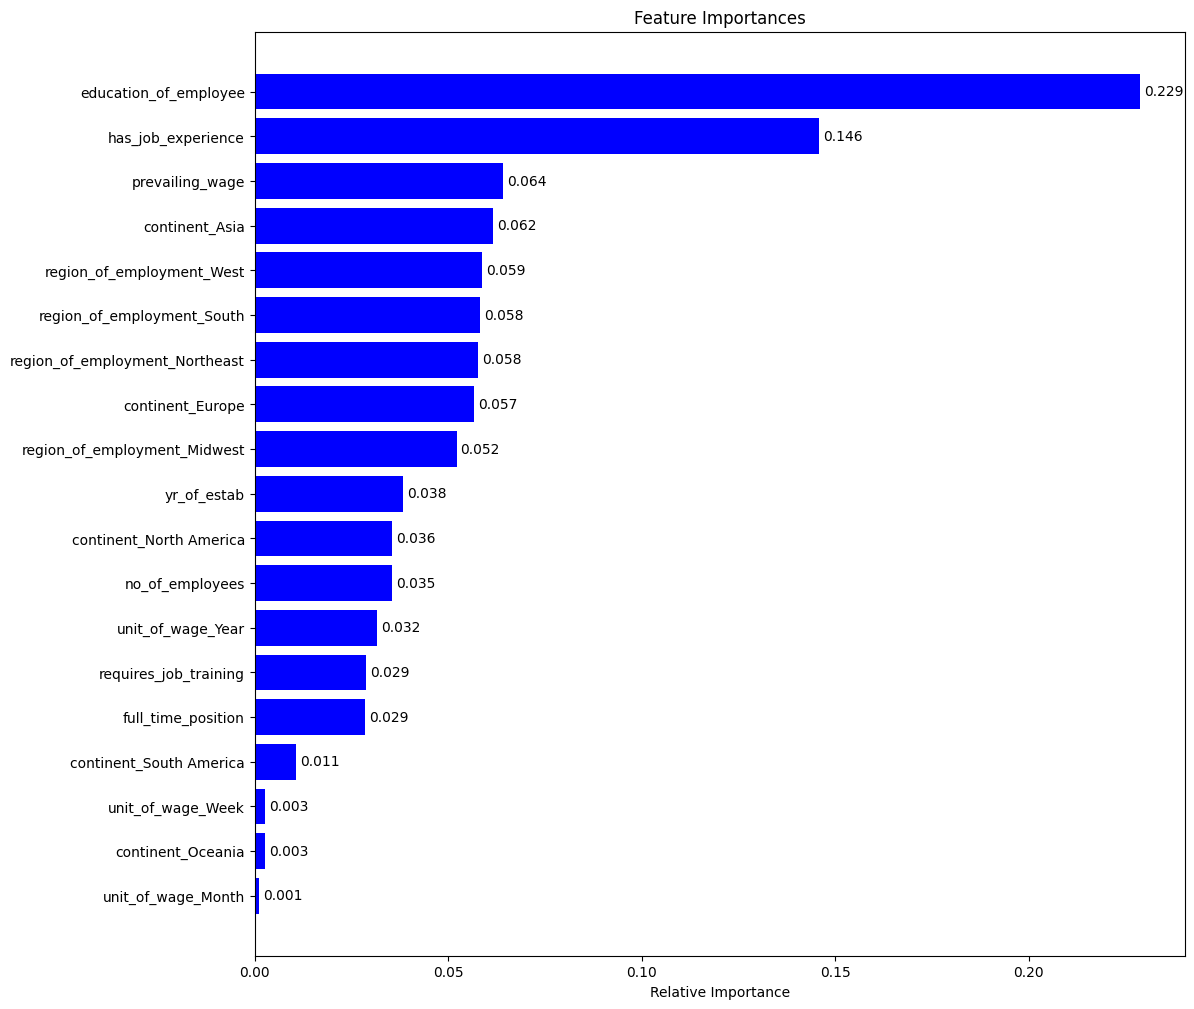

In [ ]:
# Visualization of Gini importance for different features used in the model
feature_names = X_train.columns
importances = tuned_rf2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
# Add numeric labels to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()  # Get the width of the bar (importance value)
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f"{importances[indices[i]]:.3f}", va='center')
plt.show()

## Actionable Insights and Recommendations

Based on the training, validation, test performance metrics, and feature importance data for the "easy visa" context, here are actionable insights and recommendations.

*  Model Performance:
    * The Random Forest test with oversampled data emerges as the top-performing model with a unseen data with accuracy of 0.73, recall of 0.89, and F1 score of 0.82. This indicates strong capability in identifying suitable foreign worker candidates while maintaining a good balance of precision and recall.
    
    *  GBM with oversampled data comes second also performs well on unseen data with accuracy: 0.74, recall: 0.85, F1: 0.81, suggesting robustness across validation, which is critical for consistent decision-making.

*  Generalization: Validation and test results are closely aligned for the top models, suggesting good generalization to unseen data, which is essential for reliable predictions in real-world OFLC applications.

*  Insights from Feature Importance

    *   Education of employee: Highest relative importance (~0.22), indicating that educational qualifications are the most critical factor in determining visa eligibility or suitability.
    *  Job experience: Second highest (~0.14), emphasizing the value of prior work experience.
    *  Prevailing wage: Significant importance (~0.06), reflecting the INA's requirement to match or exceed local wage standards.
    *  Region of employment (e.g., Asia, West, South): Notable importance, suggesting geographic origin and employment location influence outcomes, likely due to labor market dynamics.
    *  Other features (e.g., continent, years of establishment, number of employees): Moderate to low importance, indicating secondary but still relevant factors.

*  Recommendations and Conclusion :
    * Adopt the Random Forest model with oversampled data for predicting visa eligibility, as it delivers the best performance on unseen/test data.
    * Its high recall ensures qualified candidates are identified without being overlooked, while strong accuracy and F1 scores support reliable decision-making.
    * This model, aligned with factors like education, experience, and wage requirements, offers a compliant and efficient solution for U.S. businesses to attract skilled foreign talent.

<font size=6 color='blue'>Power Ahead</font>
___